# API Data Report
## Kyle O'Leary
### 11/22/2024
1. In 2019, Cardi B's album "Invasion of privacy" won a Grammy over Travis Scotts album "Astroworld". This went down as one of the biggest debatable wins ever. A lot of people thought Travis Scotts Astroworld should have won. I want to test this hypothesis by testing which album should have won based on each songs categories (valence, popularity, danceability, etc.). I will be calling the tracks features using API calls from spotify, wrangling the columns I need to compare the two artists albums song names and popularity numbers, and examining the response to determine which album should have won the Grammy. Now this could be unreliable because I am only looking at the popularity numbers and not the others.

In [89]:
import urllib
import requests
import pandas as pd
import json
import base64
from matplotlib import pyplot as plt

#these are what I am importing and going to use to complete my data analysis/report.

In [90]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ':' + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, 
                             data = data, 
                             headers = header)
    print(response.status_code)
    return response.json()['access_token']

#getting session token and setting up status response

In [6]:
keys = pd.read_csv('Keys.txt')

In [7]:
# keys

In [8]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [91]:
access_token

#access token

'BQDh6DiBmgOKFxNw4mwzp_pJo42D15OUqZ_jw8cq_FUQ_nJL5Hal001RxiwcN1Q_P-xWODnVa7QspJL9LGb67CQpGJySUXAx-Y5PTIUnX3XKAslqhjI'

In [92]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

#audio features, tracks, and album tracks URL

In [93]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

#set up for API call

In [12]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [13]:
travis_album_id = '41GuZcammIkupMPKH2OJ6I'
cardi_album_id = '4KdtEKjY3Gi0mKiSdy96ML'

#album ID's URI

In [94]:
ab_tracks_ep.format(travis_album_id)

#album tracks ID

'https://api.spotify.com/v1/albums/41GuZcammIkupMPKH2OJ6I/tracks'

In [95]:
travis_album_response = api_call(ab_tracks_ep.format(travis_album_id) , session_header)
cardi_album_response = api_call(ab_tracks_ep.format(cardi_album_id) , session_header)

#travis and Cardi B album set up to api call, successfull response

200
200


In [16]:
travis_album_df = pd.DataFrame(travis_album_response['items'])
cardi_album_df = pd.DataFrame(cardi_album_response['items'])
# travis_album_df.head()

In [99]:
travis_track_ids = ','.join(travis_album_df['id'].to_list())
cardi_track_ids = ','.join(cardi_album_df['id'].to_list())

#joining track ids and album df to list

In [96]:
t_features_ep + '?ids={}'.format(travis_track_ids)

#formatting track features and track id's

'https://api.spotify.com/v1/audio-features?ids=7wBJfHzpfI3032CSD7CE2m,7KZ5MMVgBVox9ycroB2UrI,2xLMifQCjDGFmkHkpNLD9h,4SZepBIPDRwPaHIjAKwRDb,1xYpVRspgaLxdJLOTQkTjg,6OaVWaGfhXn70ZJfdVcabn,6NMtzpDQBTOfJwMzgMX0zl,20MuVazoNMv6xjKPnRFOxG,11kDth1aKUEUMq9r1pqyds,6BJbOXDlgVAXSaq6wYFYT2,4MXhiYIRDMGAuvZc5IFTwC,7lAK3oHbfEnvUQWosrMMpR,27a1mYSG5tYg7dmEjWBcmL,4KYS9GK68yeuUJ8vJfPxrq,2cYqizR4lgvp4Qu6IQ3qGN,58TaFP5j5i9swOf584yon2,6vnfObZ4Ys70SBAtti1xZ9'

In [100]:
travis_track_features_ep = api_call(t_features_ep + '?ids={}'.format(travis_track_ids),
                                session_header)
cardi_track_features_ep = api_call(t_features_ep + '?ids={}'.format(cardi_track_ids),
                                session_header)

#defining track features ep

200
200


In [101]:
travis_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(travis_track_ids),
                                session_header)
cardi_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(cardi_track_ids),
                                session_header)

#defining track info

200
200


In [98]:
travis_features_df = pd.DataFrame(travis_track_features_ep['audio_features'])
cardi_features_df = pd.DataFrame(cardi_track_features_ep['audio_features'])
# travis_features_df.head()

In [22]:
travis_tracks_df = pd.DataFrame(travis_track_info['tracks'])
cardi_tracks_df = pd.DataFrame(cardi_track_info['tracks'])
travis_tracks_df.head
# data frame displaying travis and cardi b track info

<bound method NDFrame.head of                                                 album  \
0   {'album_type': 'album', 'artists': [{'external...   
1   {'album_type': 'album', 'artists': [{'external...   
2   {'album_type': 'album', 'artists': [{'external...   
3   {'album_type': 'album', 'artists': [{'external...   
4   {'album_type': 'album', 'artists': [{'external...   
5   {'album_type': 'album', 'artists': [{'external...   
6   {'album_type': 'album', 'artists': [{'external...   
7   {'album_type': 'album', 'artists': [{'external...   
8   {'album_type': 'album', 'artists': [{'external...   
9   {'album_type': 'album', 'artists': [{'external...   
10  {'album_type': 'album', 'artists': [{'external...   
11  {'album_type': 'album', 'artists': [{'external...   
12  {'album_type': 'album', 'artists': [{'external...   
13  {'album_type': 'album', 'artists': [{'external...   
14  {'album_type': 'album', 'artists': [{'external...   
15  {'album_type': 'album', 'artists': [{'external...   
1

In [23]:
travis_merged = pd.merge(travis_features_df, travis_tracks_df, 
         how = 'inner', on = 'id')
travis_merged.head()

#travis_merged.head

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.487,0.789,8,-3.690,1,0.0440,0.00947,0.000004,0.189,0.0564,...,{'spotify': 'https://open.spotify.com/track/7w...,https://api.spotify.com/v1/tracks/7wBJfHzpfI30...,False,True,STARGAZING,73,https://p.scdn.co/mp3-preview/dbc5f9d87513fb60...,1,track,spotify:track:7wBJfHzpfI3032CSD7CE2m
1,0.428,0.403,5,-5.914,0,0.2090,0.22900,0.000000,0.220,0.1330,...,{'spotify': 'https://open.spotify.com/track/7K...,https://api.spotify.com/v1/tracks/7KZ5MMVgBVox...,False,True,CAROUSEL,64,https://p.scdn.co/mp3-preview/1d0d1d66e1fff4ae...,2,track,spotify:track:7KZ5MMVgBVox9ycroB2UrI
2,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.124,0.4460,...,{'spotify': 'https://open.spotify.com/track/2x...,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,False,True,SICKO MODE,81,https://p.scdn.co/mp3-preview/8229545ded5cacf3...,3,track,spotify:track:2xLMifQCjDGFmkHkpNLD9h
3,0.607,0.609,0,-5.978,0,0.2910,0.38900,0.000016,0.111,0.5560,...,{'spotify': 'https://open.spotify.com/track/4S...,https://api.spotify.com/v1/tracks/4SZepBIPDRwP...,False,True,R.I.P. SCREW,64,https://p.scdn.co/mp3-preview/0e3a544cd2e1875b...,4,track,spotify:track:4SZepBIPDRwPaHIjAKwRDb
4,0.588,0.567,4,-3.738,0,0.0628,0.22100,0.000000,0.135,0.1130,...,{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xYpVRspgaLx...,False,True,STOP TRYING TO BE GOD,66,https://p.scdn.co/mp3-preview/94d1a277b4b8b459...,5,track,spotify:track:1xYpVRspgaLxdJLOTQkTjg


In [102]:
travis_merged.columns

#showing travis_merged index

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'artist'],
      dtype='object')

In [103]:
cardi_merged = pd.merge(cardi_features_df, cardi_tracks_df, 
                     how = 'inner', on = 'id')
travis_merged['artist'] = "Travis Scott"
cardi_merged['artist'] = "Cardi B"
travis_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'artist'],
      dtype='object')

In [26]:
artist_compare = pd.concat([travis_merged, cardi_merged], axis = 0)
artist_compare
# comparing the artists using concat which combines two strings into one large string

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.487,0.789,8,-3.690,1,0.0440,0.00947,0.000004,0.1890,0.0564,...,https://api.spotify.com/v1/tracks/7wBJfHzpfI30...,False,True,STARGAZING,73,https://p.scdn.co/mp3-preview/dbc5f9d87513fb60...,1,track,spotify:track:7wBJfHzpfI3032CSD7CE2m,Travis Scott
1,0.428,0.403,5,-5.914,0,0.2090,0.22900,0.000000,0.2200,0.1330,...,https://api.spotify.com/v1/tracks/7KZ5MMVgBVox...,False,True,CAROUSEL,64,https://p.scdn.co/mp3-preview/1d0d1d66e1fff4ae...,2,track,spotify:track:7KZ5MMVgBVox9ycroB2UrI,Travis Scott
2,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.4460,...,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,False,True,SICKO MODE,81,https://p.scdn.co/mp3-preview/8229545ded5cacf3...,3,track,spotify:track:2xLMifQCjDGFmkHkpNLD9h,Travis Scott
3,0.607,0.609,0,-5.978,0,0.2910,0.38900,0.000016,0.1110,0.5560,...,https://api.spotify.com/v1/tracks/4SZepBIPDRwP...,False,True,R.I.P. SCREW,64,https://p.scdn.co/mp3-preview/0e3a544cd2e1875b...,4,track,spotify:track:4SZepBIPDRwPaHIjAKwRDb,Travis Scott
4,0.588,0.567,4,-3.738,0,0.0628,0.22100,0.000000,0.1350,0.1130,...,https://api.spotify.com/v1/tracks/1xYpVRspgaLx...,False,True,STOP TRYING TO BE GOD,66,https://p.scdn.co/mp3-preview/94d1a277b4b8b459...,5,track,spotify:track:1xYpVRspgaLxdJLOTQkTjg,Travis Scott
5,0.731,0.811,1,-3.225,1,0.0712,0.02040,0.000000,0.4110,0.4260,...,https://api.spotify.com/v1/tracks/6OaVWaGfhXn7...,False,True,NO BYSTANDERS,71,https://p.scdn.co/mp3-preview/70bd42f5912cd79f...,6,track,spotify:track:6OaVWaGfhXn70ZJfdVcabn,Travis Scott
6,0.460,0.686,0,-5.948,0,0.0367,0.00146,0.000000,0.3750,0.2520,...,https://api.spotify.com/v1/tracks/6NMtzpDQBTOf...,False,True,SKELETONS,79,https://p.scdn.co/mp3-preview/5384b3223cc750b8...,7,track,spotify:track:6NMtzpDQBTOfJwMzgMX0zl,Travis Scott
7,0.741,0.645,11,-5.116,0,0.0963,0.19200,0.000000,0.1630,0.4880,...,https://api.spotify.com/v1/tracks/20MuVazoNMv6...,False,True,WAKE UP,65,https://p.scdn.co/mp3-preview/aba2af9b263620f0...,8,track,spotify:track:20MuVazoNMv6xjKPnRFOxG,Travis Scott
8,0.712,0.481,4,-5.415,0,0.0487,0.17300,0.000000,0.2410,0.0620,...,https://api.spotify.com/v1/tracks/11kDth1aKUEU...,False,True,5% TINT,75,https://p.scdn.co/mp3-preview/c1bcb779bca4da7d...,9,track,spotify:track:11kDth1aKUEUMq9r1pqyds,Travis Scott
9,0.804,0.763,2,-5.480,1,0.0519,0.06780,0.000000,0.3680,0.0585,...,https://api.spotify.com/v1/tracks/6BJbOXDlgVAX...,False,True,NC-17,63,https://p.scdn.co/mp3-preview/61775f698136ec38...,10,track,spotify:track:6BJbOXDlgVAXSaq6wYFYT2,Travis Scott


In [27]:
name_popularity_artist = travis_merged[["name", "popularity", "artist"]]
# Wrangling travis scotts songs names, popularity number, and artist name

In [28]:
name_popularity_artist.head(17)
#  Displaying the first 17 rows of Travis album song names with their respected popularity numbers

,name,popularity,artist
0,STARGAZING,73,Travis Scott
1,CAROUSEL,64,Travis Scott
2,SICKO MODE,81,Travis Scott
3,R.I.P. SCREW,64,Travis Scott
4,STOP TRYING TO BE GOD,66,Travis Scott
5,NO BYSTANDERS,71,Travis Scott
6,SKELETONS,79,Travis Scott
7,WAKE UP,65,Travis Scott
8,5% TINT,75,Travis Scott
9,NC-17,63,Travis Scott


In [29]:
name_popularity_artist = cardi_merged[["name", "popularity", "artist"]]
# Wrangling Cardi B's songs names, popularity number, and artist name

In [30]:
name_popularity_artist.head(13)
# Displaying the first 13 rows Cardi B's album song names with their respected popularity numbers

,name,popularity,artist
0,Get Up 10,51,Cardi B
1,Drip (feat. Migos),53,Cardi B
2,Bickenhead,47,Cardi B
3,Bodak Yellow,70,Cardi B
4,Be Careful,66,Cardi B
5,Best Life (feat. Chance The Rapper),47,Cardi B
6,I Like It,74,Cardi B
7,Ring (feat. Kehlani),63,Cardi B
8,Money Bag,49,Cardi B
9,Bartier Cardi (feat. 21 Savage),59,Cardi B


1. In conclusion, this hypothesis was tested using applications through spotify's API resources. With these API resources, I was able to grab the albums URI's and merge their endpoints and see their responses. To determine which album was better, I focused on the artists songs popularity numbers to each other since that is the most important category, but other categories can be a contributing factor as well. Cardi B, who won the grammy, had 8 songs with a popularity of 60 or below, 4 songs with a popularity of 61-70, and one song with a popularity of 70+. Travis Scott,who didn't win the Grammy, had no songs with a popularity of 60 or below, 8 songs with a popularity of 61-70, and 9 songs with a popularity of 70+ with 3 of them being in the 80+ unlike Cardi B. Based off these efforts, it is fair to say that Travis Scott not winning Grammy is debatable, and again, I really only focused on the poplarity numbers, so in other categories Cardi B could have better numbers than Travis Scott. Some potential next steps that could be done to determine why Cardi B's album won is to compare the songs each individual category, such as valence, liveness, instrumentals, etc, to determine if maybe Cardi B had better numbers in those categories compared to just popularity numbers. Some next steps could also be making a bar graph comparing the two artist albums, clearly displaying who had the better album and who should have won the Grammy.

In [79]:
artist_compare.columns

#here I am looking to see what my categories were from my data from from the artist_compare call, which displayed a data frame of both Cardi B and Travis Scotts ratings in each category

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'artist'],
      dtype='object')

In [87]:
artist_compare.groupby('artist')['id'].count()

#here I am grouping the arist together by using .groupby

artist
Cardi B         13
Travis Scott    17
Name: id, dtype: int64

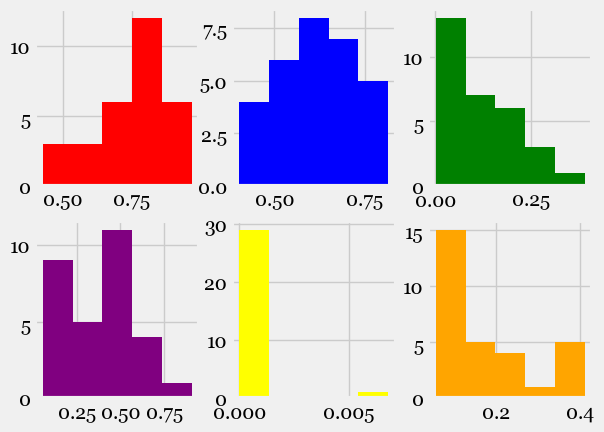

In [81]:
fig2, ax2 = plt.subplots(2,3)
ax2[0,0].hist(artist_compare['danceability'], bins = 5, color = 'red')
ax2[0,1].hist(artist_compare['energy'], bins = 5, color = 'blue')
ax2[0,2].hist(artist_compare['acousticness'], bins = 5, color = 'green')
ax2[1,0].hist(artist_compare['valence'], bins = 5, color = 'purple')
ax2[1,1].hist(artist_compare['instrumentalness'], bins = 5, color = 'yellow')
ax2[1,2].hist(artist_compare['liveness'], bins = 5, color = 'orange')
plt.show()

#these bar graphs show the generality of boths artist ratings in each category. Ex acousticness, energy, valence, etc.

In [82]:
artist_compare[artist_compare['liveness'] > .35] [['name', 'artist']]

#here I am looking at which artist had songs less than .35 in the liveness category by doing liveness > .35

,name,artist
5,NO BYSTANDERS,Travis Scott
6,SKELETONS,Travis Scott
9,NC-17,Travis Scott
6,I Like It,Cardi B
9,Bartier Cardi (feat. 21 Savage),Cardi B


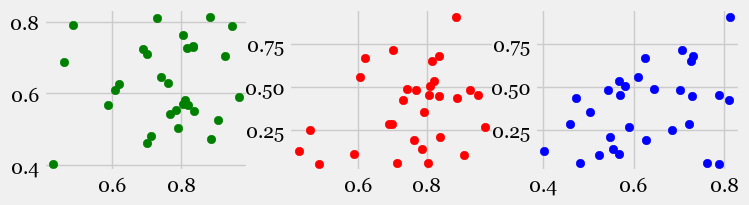

In [83]:
fig3, ax3 = plt.subplots(1, 3, figsize = (8, 2))
ax3[0].scatter(artist_compare['danceability'], artist_compare['energy'], color = 'green')
ax3[1].scatter(artist_compare['danceability'], artist_compare['valence'], color = 'red')
ax3[2].scatter(artist_compare['energy'], artist_compare['valence'], color = 'blue')

plt.show()

#these are scatter plots showing the generality of the artists ratings in some of the categories, similar to the bar plots.

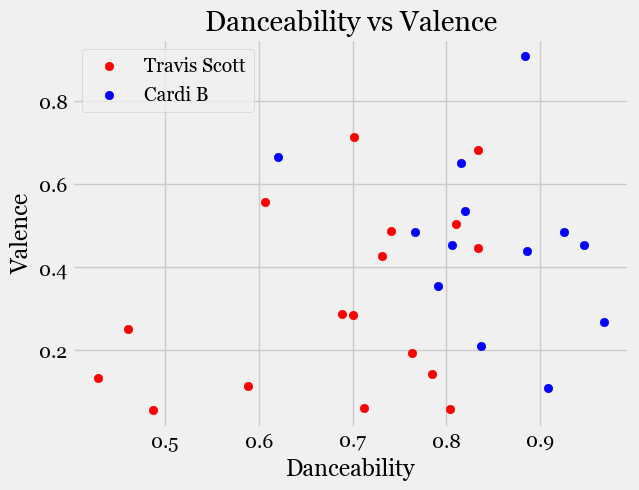

In [85]:
Travis = artist_compare[artist_compare['artist'] == 'Travis Scott']
Cardi = artist_compare[artist_compare['artist'] == 'Cardi B']

fig5, ax5 = plt.subplots()
ax5.scatter(Travis['danceability'], Travis['valence'], label = "Travis Scott", color = 'red')
ax5.scatter(Cardi['danceability'], Cardi['valence'], label = "Cardi B", color = 'blue')

ax5.set_title("Danceability vs Valence")
ax5.set_xlabel("Danceability")
ax5.set_ylabel("Valence")
plt.rcParams["font.sans-serif"] = ["Georgia", "DejaVu Sans"]
plt.style.use("fivethirtyeight")
ax5.legend()
plt.show()

#here is a scatter plot that is more easy to read with titles and a key. This scatter plot displays each artist danceability vs valence in their music.

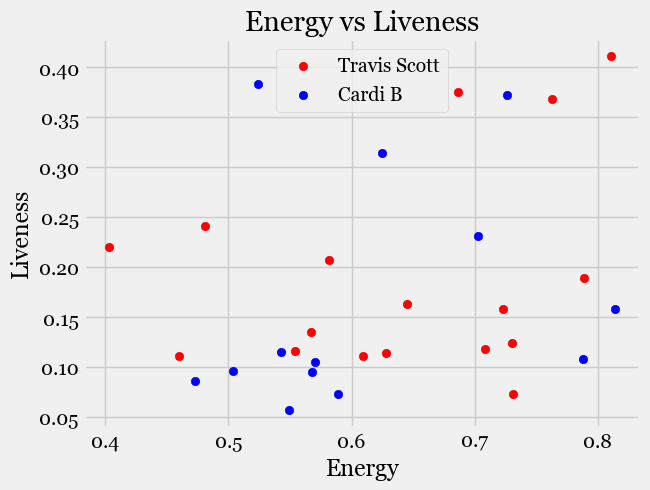

In [118]:
Travis = artist_compare[artist_compare['artist'] == 'Travis Scott']
Cardi = artist_compare[artist_compare['artist'] == 'Cardi B']

fig5, ax5 = plt.subplots()
ax5.scatter(Travis['energy'], Travis['liveness'], label = "Travis Scott", color = 'red')
ax5.scatter(Cardi['energy'], Cardi['liveness'], label = "Cardi B", color = 'blue')

ax5.set_title("Energy vs Liveness")
ax5.set_xlabel("Energy")
ax5.set_ylabel("Liveness")
plt.rcParams["font.sans-serif"] = ["Georgia", "DejaVu Sans"]
plt.style.use("fivethirtyeight")
ax5.legend()
plt.show()

#This scatter plot displays each artists songs energy vs liveness

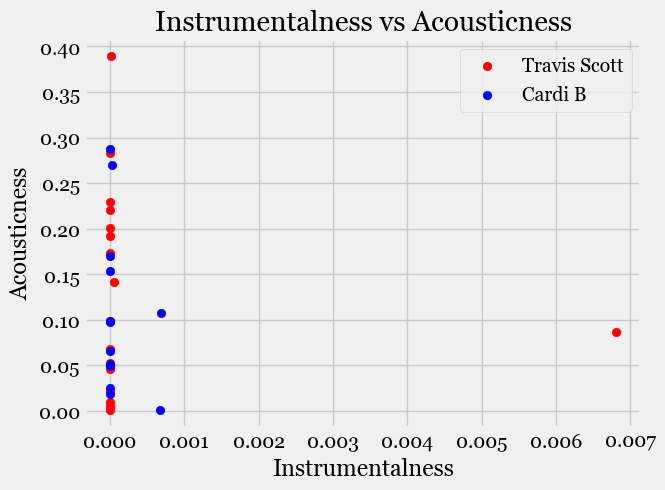

In [117]:
Travis = artist_compare[artist_compare['artist'] == 'Travis Scott']
Cardi = artist_compare[artist_compare['artist'] == 'Cardi B']

fig5, ax5 = plt.subplots()
ax5.scatter(Travis['instrumentalness'], Travis['acousticness'], label = "Travis Scott", color = 'red')
ax5.scatter(Cardi['instrumentalness'], Cardi['acousticness'], label = "Cardi B", color = 'blue')

ax5.set_title("Instrumentalness vs Acousticness")
ax5.set_xlabel("Instrumentalness")
ax5.set_ylabel("Acousticness")
plt.rcParams["font.sans-serif"] = ["Georgia", "DejaVu Sans"]
plt.style.use("fivethirtyeight")
ax5.legend()
plt.show()

#This scatter plot displays each artists songs instrumentalness vs acousticness

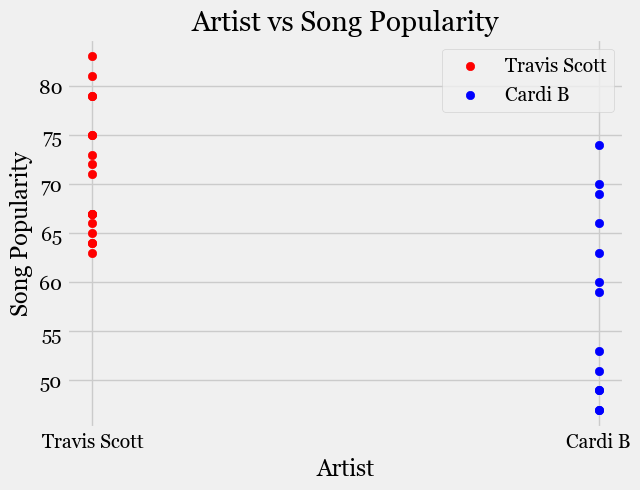

In [115]:
Travis = artist_compare[artist_compare['artist'] == 'Travis Scott']
Cardi = artist_compare[artist_compare['artist'] == 'Cardi B']

fig5, ax5 = plt.subplots()
ax5.scatter(Travis['artist'], Travis['popularity'], label = "Travis Scott", color = 'red')
ax5.scatter(Cardi['artist'], Cardi['popularity'], label = "Cardi B", color = 'blue')

ax5.set_title("Artist vs Song Popularity")
ax5.set_xlabel("Artist")
ax5.set_ylabel("Song Popularity")
plt.rcParams["font.sans-serif"] = ["Georgia", "DejaVu Sans"]
plt.style.use("fivethirtyeight")
ax5.legend()
plt.show()

#This one displays the Artist and the number of popularity their tracks each had.

1. I have made some graphs and I tried to best match each category to another and see which artist had better numbers (ex. liveness vs energy, instrumentalness vs acousticness, etc). Looking at my results of what I have made, each artist fairs better in some categories than others, but for the most part, I am seeing that Travis Scott has slightly better numbers than Cardi B. Is it clear that one artist should have one over the other? It is very debatable. In my opinion, I do think Travis Scott should have won the Grammy not only because his numbers fair slightly better than Cardi B but also because he released his album later than Cardi B's (August 3rd vs April 8) so he had less time to reach better numbers but he did. Overall, it is very debatable and who really knows who deserved the Grammy, they are both good artist and they each may have a chance to win another one.